<a href="https://colab.research.google.com/github/mostafa-ja/Machine-Learning-fall2023/blob/main/adversarial_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

mnist_train = datasets.MNIST("../data", train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST("../data", train=False, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(mnist_train, batch_size = 100000, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size = 100000, shuffle=False)

In [6]:
X,y =next(iter(train_loader))
print(X.shape)
print(y.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


In [7]:
y

tensor([7, 0, 2,  ..., 0, 0, 4])

In [8]:
print(X.min())
print(X.max())

tensor(0.)
tensor(1.)


In [9]:
X.mean()

tensor(0.1307)

In [10]:
X[0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

<Figure size 640x480 with 0 Axes>

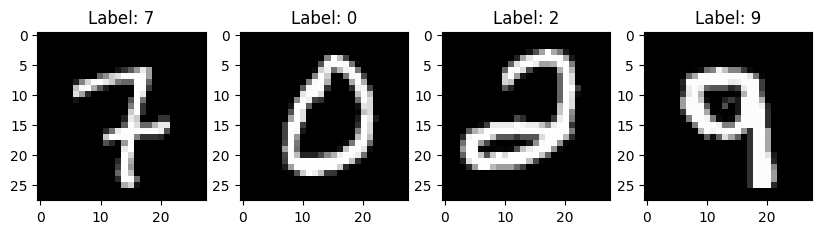

In [11]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(4):
 plt.subplot(1,4,i+1)
 plt.imshow(X[i][0])
 plt.title("Label: {}".format(y[i]))

In [13]:
from sklearn.cluster import KMeans

k = 10
kmeans_cluster = KMeans(init="k-means++", n_clusters=k, n_init=10, random_state=0)
kmeans_cluster.fit(X.view(X.shape[0], -1))

KMeans(n_clusters=10, n_init=10, random_state=0)

In [41]:
cluster_labels = kmeans_cluster.labels_
print(cluster_labels.shape)
print(cluster_labels[:15])

(60000,)
[6 9 4 1 2 9 2 1 9 9 7 2 4 0 2]


In [42]:
def retrieve_info(model,y_train):

# Initializing
  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(model.labels_))):
    index = np.where(model.labels_ == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [44]:
retrieve_info(kmeans_cluster,y)
# 0:5 means ,   A cluster label of 0 is a cluster of images of 5

{0: 5, 1: 4, 2: 1, 3: 8, 4: 2, 5: 6, 6: 1, 7: 3, 8: 7, 9: 0}

In [45]:
# predicted lables based on clustering
reference_labels = retrieve_info(kmeans_cluster,y)
predicted = np.random.rand(len(cluster_labels))
for i in range(len(cluster_labels)):
  predicted[i] = reference_labels[kmeans_cluster.labels_[i]]

In [46]:
# Comparing Predicted values and Actual values
print(predicted[:20].astype('int'))
print(y[:20].numpy())

[1 0 2 4 1 0 1 4 0 0 3 1 2 5 1 2 2 2 1 1]
[7 0 2 9 1 0 1 7 0 5 0 1 2 0 1 2 2 2 1 5]


**Inertia** is a measure of how internally coherent clusters are

**Homogeneity** is a measure of data points of a particular cluster belonging to a single class.

**Accuracy** score is the percentage of correctly predicted values



In [33]:
print('Inertia : {}'.format(kmeans_cluster.inertia_))

Inertia : 2352978.2419670145


In [30]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(predicted,y.numpy()))

0.5824666666666667


In [29]:
from sklearn import metrics
metrics.homogeneity_score(predicted,y.numpy())

0.5251588616820974

# Optimizing the Algorithm

In [34]:
X_test,y_test =next(iter(test_loader))
print(X_test.shape)
print(y_test.shape)

torch.Size([10000, 1, 28, 28])
torch.Size([10000])


In [66]:
# Function to calculate metrics for the model
def calculate_metrics(model,output):
 print('Number of clusters is {}'.format(model.n_clusters))
 print('Inertia : {}'.format(model.inertia_))
 print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))


In [67]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
  total_clusters = len(np.unique(y_test))
  # Initialize the K-Means model
  kmeans = MiniBatchKMeans(n_clusters = i, n_init = 'auto')
  # Fitting the model to training set
  kmeans.fit(X.view(X.shape[0], -1))
  # Calculating the metrics

  calculate_metrics(kmeans,y)
  # Calculating reference_labels
  reference_labels = retrieve_info(kmeans,y)
  # ‘number_labels’ is a list which denotes the number displayed in image
  number_labels = np.random.rand(len(kmeans.labels_))
  for i in range(len(kmeans.labels_)):

    number_labels[i] = reference_labels[kmeans.labels_[i]]

  print('Accuracy score : {}'.format(accuracy_score(number_labels,y)))
  print('\n')

Number of clusters is 10
Inertia : 2385668.0280922316
Homogeneity :       0.4654979397214422
Accuracy score : 0.5540166666666667


Number of clusters is 16
Inertia : 2214172.394361463
Homogeneity :       0.5640106415720788
Accuracy score : 0.6651


Number of clusters is 36
Inertia : 1957830.8839810407
Homogeneity :       0.6903680256022684
Accuracy score : 0.7625333333333333


Number of clusters is 64
Inertia : 1806822.5415502172
Homogeneity :       0.7525554315756776
Accuracy score : 0.8378833333333333


Number of clusters is 144
Inertia : 1622390.2054493378
Homogeneity :       0.8142935806025311
Accuracy score : 0.8794333333333333


Number of clusters is 256
Inertia : 1503896.0616996842
Homogeneity :       0.8413638340286341
Accuracy score : 0.8989




In [49]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
  total_clusters = len(np.unique(y_test))
  # Initialize the K-Means model
  kmeans = kmeans_cluster = KMeans(init="k-means++", n_clusters= i, n_init='auto', random_state=0)
  # Fitting the model to training set
  kmeans.fit(X.view(X.shape[0], -1))
  # Calculating the metrics

  calculate_metrics(kmeans,y)
  # Calculating reference_labels
  reference_labels = retrieve_info(kmeans,y)
  # ‘number_labels’ is a list which denotes the number displayed in image
  number_labels = np.random.rand(len(kmeans.labels_))
  for i in range(len(kmeans.labels_)):

    number_labels[i] = reference_labels[kmeans.labels_[i]]

  print('Accuracy score : {}'.format(accuracy_score(number_labels,y)))
  print('\n')

Number of clusters is 10
Inertia : 2353224.7869778173
Homogeneity :       0.47982037207711253
Accuracy score : 0.57785


Number of clusters is 16
Inertia : 2188970.8504324253
Homogeneity :       0.5858154089428216
Accuracy score : 0.6813166666666667


Number of clusters is 36
Inertia : 1936453.4031960412
Homogeneity :       0.7002400105140703
Accuracy score : 0.7758


Number of clusters is 64
Inertia : 1784677.3564796888
Homogeneity :       0.7553473004923883
Accuracy score : 0.8289


Number of clusters is 144
Inertia : 1595812.5202347515
Homogeneity :       0.8257733164329188
Accuracy score : 0.8867


Number of clusters is 256
Inertia : 1475489.845218704
Homogeneity :       0.8588057737222182
Accuracy score : 0.9160333333333334




In [72]:
# Function to calculate metrics for the model
def calculate_metrics(model,input,output):
 print('Number of clusters is {}'.format(model.n_clusters))
 print('Inertia : {}'.format(model.inertia_))
 print('Homogeneity : {}'.format(metrics.homogeneity_score(output,model.labels_)))
 print('Silhouette : {}'.format(metrics.silhouette_score(input.view(input.shape[0], -1),model.labels_)))

In [78]:
# Testing model on Testing set
# Initialize the K-Means model
kmeans = KMeans(init="k-means++", n_clusters=256, n_init='auto', random_state=0)
#kmeans = MiniBatchKMeans(n_clusters = 256)

# Fitting the model to testing set
kmeans.fit(X_test.view(X_test.shape[0], -1))
# Calculating the metrics
calculate_metrics(kmeans,X_test.view(X_test.shape[0], -1),y_test)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):

 number_labels[i] = reference_labels[kmeans.labels_[i]]

print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

Number of clusters is 256
Inertia : 233023.33240571414
Homogeneity : 0.870377317214257
Silhouette : 0.05347183719277382
Accuracy score : 0.9105




In [79]:
centroids = kmeans.cluster_centers_
centroids.shape

(256, 784)

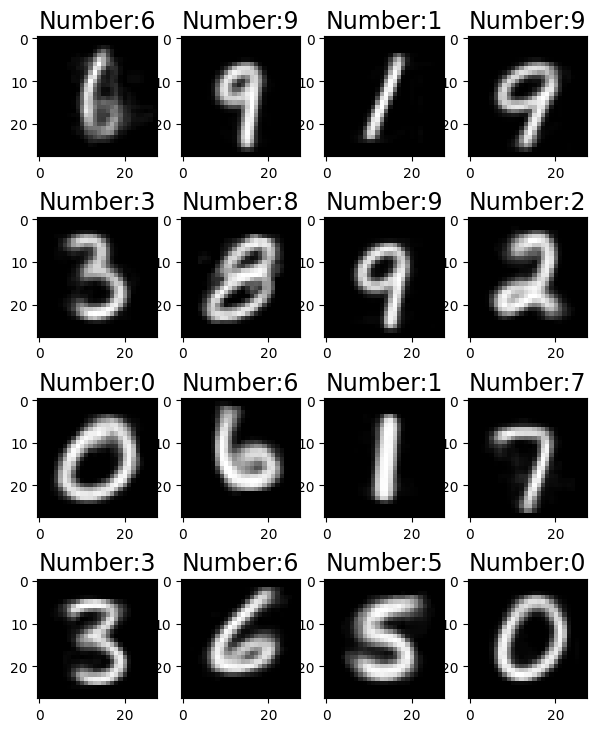

In [80]:
centroids = centroids.reshape(-1,28,28)

plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
 plt.subplots_adjust(bottom)
 plt.subplot(4,4,i+1)
 plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
 plt.imshow(centroids[i])

In [81]:
# Testing model on Testing set
# Initialize the K-Means model
kmeans = KMeans(init="k-means++", n_clusters=10, n_init='auto', random_state=0)
#kmeans = MiniBatchKMeans(n_clusters = 256)

# Fitting the model to testing set
kmeans.fit(X_test.view(X_test.shape[0], -1))
# Calculating the metrics
calculate_metrics(kmeans,X_test.view(X_test.shape[0], -1),y_test)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):

 number_labels[i] = reference_labels[kmeans.labels_[i]]

print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

Number of clusters is 10
Inertia : 392687.6438988746
Homogeneity : 0.4798039274409927
Silhouette : 0.05598095804452896
Accuracy score : 0.5496




In [82]:
centroids = kmeans.cluster_centers_
centroids.shape

(10, 784)

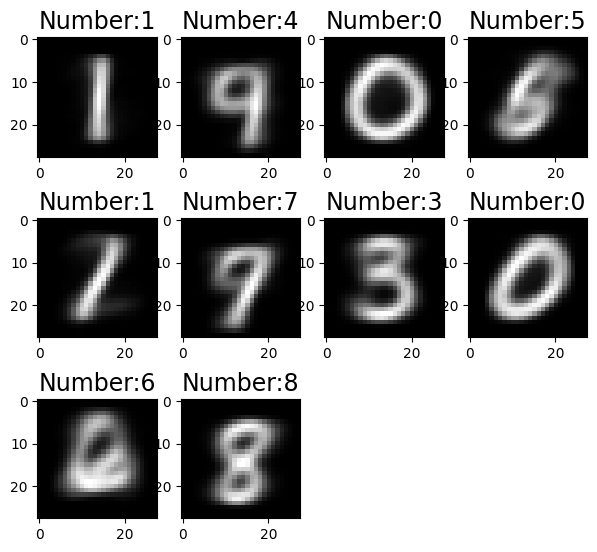

In [83]:
centroids = centroids.reshape(-1,28,28)

plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(10):
 plt.subplots_adjust(bottom)
 plt.subplot(4,4,i+1)
 plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
 plt.imshow(centroids[i])

In [85]:
number_labels

array([7., 3., 1., ..., 7., 5., 6.])

In [86]:
y_test

tensor([7, 2, 1,  ..., 4, 5, 6])

In [92]:
number_labels[y_test==8]

array([5., 8., 8., 8., 8., 8., 8., 8., 8., 3., 8., 8., 7., 5., 1., 8., 8.,
       3., 8., 4., 8., 3., 8., 5., 8., 8., 8., 8., 7., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 4., 0., 5., 0., 5., 1., 4., 6., 8., 8., 8., 1., 3.,
       8., 1., 8., 3., 8., 8., 8., 8., 5., 5., 4., 8., 8., 3., 8., 8., 3.,
       8., 8., 3., 8., 3., 3., 3., 8., 8., 3., 3., 3., 8., 3., 5., 3., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 5., 8., 7., 8., 8., 6., 8., 1., 1.,
       4., 8., 8., 8., 4., 5., 3., 3., 8., 8., 3., 3., 8., 8., 8., 8., 8.,
       8., 8., 3., 1., 1., 8., 8., 5., 8., 8., 3., 3., 5., 5., 1., 1., 8.,
       3., 5., 1., 3., 3., 3., 8., 7., 3., 8., 8., 3., 8., 8., 8., 8., 1.,
       8., 8., 8., 8., 3., 8., 8., 3., 8., 1., 8., 0., 8., 5., 8., 8., 5.,
       5., 4., 0., 5., 8., 7., 4., 5., 1., 3., 8., 3., 1., 5., 8., 4., 8.,
       6., 8., 5., 1., 3., 4., 8., 8., 5., 8., 8., 1., 4., 8., 0., 8., 5.,
       1., 8., 8., 7., 8., 8., 3., 8., 3., 8., 8., 8., 8., 8., 8., 8., 4.,
       8., 8., 0., 8., 8.

In [96]:
# Count occurrences using np.bincount
counts = np.bincount(number_labels[y_test==0].astype(int), minlength = 10)
counts

array([856,   1,   0,  37,   3,  68,   9,   1,   5,   0])

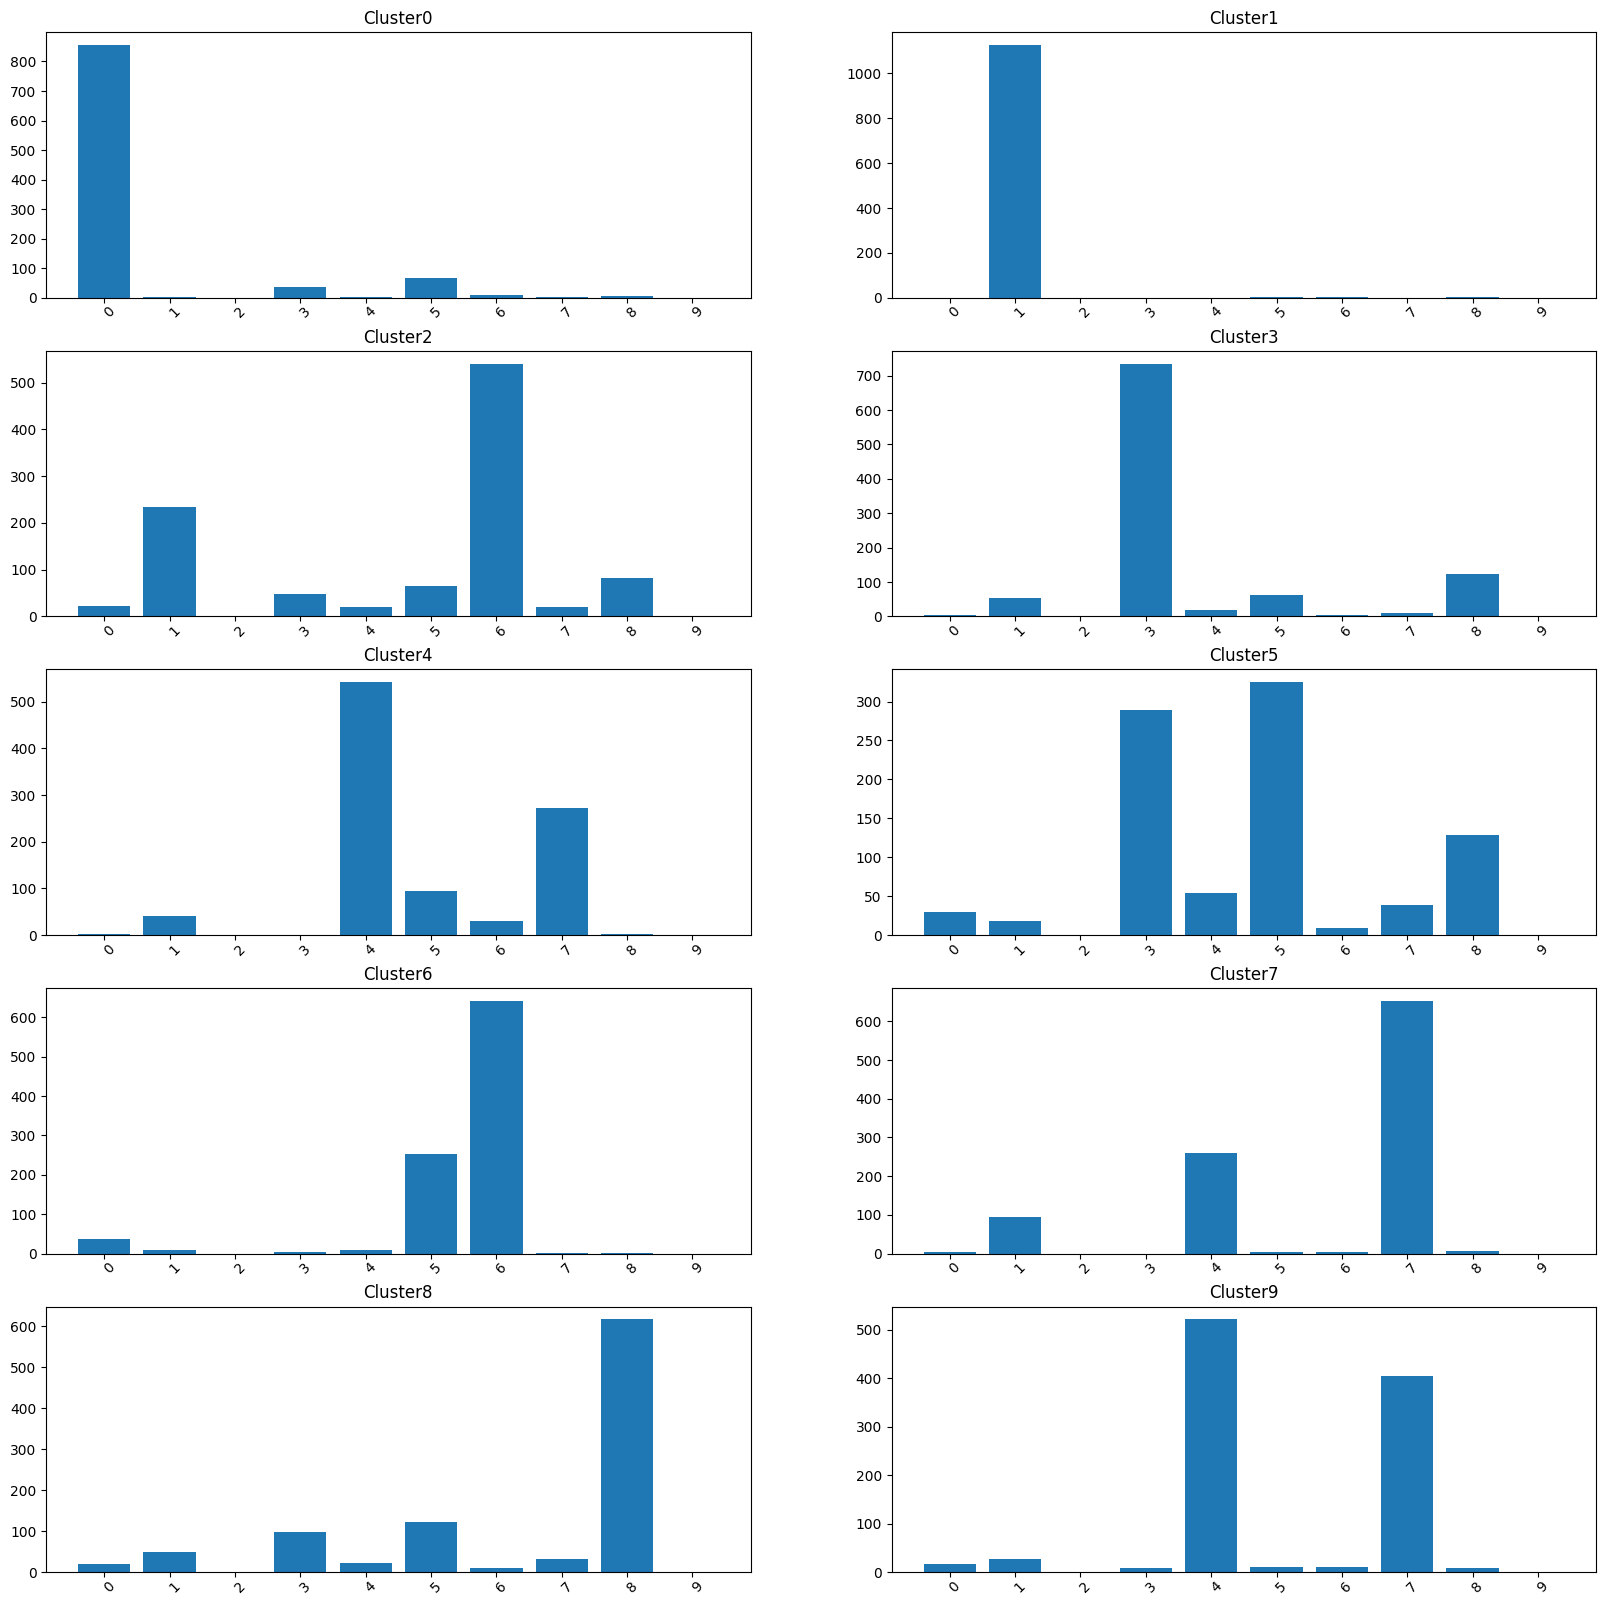

In [101]:
#Bar graph with the number of items of different categories clustered in it
plt.figure(figsize=(20,20))

# Create indices for each bar
indices = np.arange(10)

for i in range(10):
    plt.subplot(5, 2, i+1)
    counts = np.bincount(number_labels[y_test==i].astype(int), minlength = 10)
    plt.bar(indices, counts, align='center')
    plt.xticks(indices, indices, rotation=45, rotation_mode='anchor')
    plt.title("Cluster" + str(i))

# soft clustering

In [103]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X.view(X_test.shape[0], -1))
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_test.view(X_test.shape[0], -1)[representative_digit_idx]

In [106]:
X_digits_dist[0]

array([19.19598317, 19.52150592, 20.27108084, 19.92615305, 20.11024529,
       19.27473807, 19.34491674, 20.01537167, 18.08502977, 18.63269819,
       20.07895442, 19.74516636, 19.40093398, 20.50956637, 17.9536822 ,
       18.6485855 , 20.30705752, 19.16000899, 18.79230221, 20.25364861,
       19.19893645, 20.0872669 , 19.28682238, 18.78148099, 19.4611753 ,
       19.97899316, 19.19296524, 19.79516821, 19.92111613, 19.80086113,
       19.36498372, 19.1384741 , 19.69417711, 19.06679335, 18.43530714,
       18.45098216, 17.57904629, 19.54373919, 19.04158241, 19.69979829,
       18.77997483, 19.34707988, 18.78057957, 18.56526688, 17.012868  ,
       19.40466303, 18.47134229, 19.55263601, 19.87668073, 19.80770869])

In [113]:
X_representative_digits.shape

torch.Size([50, 784])

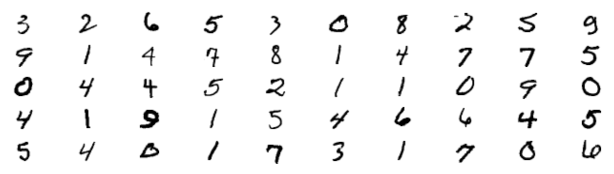

In [115]:
# extra code – this cell generates and saves Figure 9–13

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(28,28), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()